# Solving the time independent Schrödinger equation to find solutions for Quantum-Mechanical Systems  

## Introduction

In this report I will be solving the time independent Schrödinger equation (TISE), for an infinite square well, a finite square well and for a quantum harmonic oscillator.

The TISE is the basic equation of non-relativistic quantum mechanics [1]:

$$ -\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{d x^2}  + V(x)\psi(x) = E\psi(x)$$

Where:

- $\hbar$ is a constant equal to $1.05\times10^{-34} m^{2} kg/s$

- $m$ is the mass of the particle

- $\frac{d^2\psi(x)}{d x^2}$ is a second order differential equation

- $\psi(x)$ is the wavefunction

- $V(x)$ is the potential

- $E$ is the energy

Eigenvalue equations are equation of the type [1]:

$$ Ax = \lambda x $$

Where $A$ is an operator and $\lambda$ is a number. A solution $x$ of such an equation is called an **eigenfunction** corresponding to the **eigenvalue** $\lambda$ of the operator $A$. 

Therefore, the TISE can be written in terms of an eigenvalue equation:
$$\hat H \psi(x) = E \psi(x)$$

So the eigenfunction, $\psi(x)$, corresponds to the eigenvalues $E$. The operator, $\hat H$, is a differential operator - the Hamiltonian operator:

$$\hat H = -\frac{\hbar^2}{2m}\frac{d^2}{d x^2} + V(x) $$

Using the fact that the TISE can be written as the eigenvalue equation, will be how I will solve this equation for different quantum mechanical systems. This is because `numpy.linalg` contains routines to solve eigenvalue problems. 

The eigenfunction, $\psi(x)$, is the wavefunction. In quantum mechanics, particles are represented by a wavefunction. The Born interpretation of the wavefunction states that, the modulus squared of the wavefunction is the probablity of finding that particle at that position and at that time. 

$$ \rho = |\Psi(x,t)|^{2} $$

If $\Psi$ describes a single particle, the probability of finding a particle anywhere on the x-axis is 1:

$$\int_{-\infty}^{\infty}|\mathrm{\Psi}| ^{2}\,\mathrm{d}x = 1$$ 

This is known as the **normalisation** of the wavefunction. 

There are physical constratints on the behaviour of the wavefunction, these are boundary conditions [2]:

1. The wavefunction must tend to zero, as x tends to plus or minus infinity: $\lim\limits_{x \to \mp\infty} \psi(x) = 0 $

2. The wavefunction must be square integrable, since the probability interpretation requires that $\int |\mathrm{\psi(x)}| ^{2}\,\mathrm{d}x = 1$, which is finite

3. As $|\psi(x)|^{2}$ represents a physical probability density, $\psi(x)$  must be single valued

4. $\psi(x)$ must be continuous everywhere, otherwise $|\psi(x)|^{2}$ would not have a unique valye and thus could not represent a physical probability density

5. The derivative $\frac{d\psi(x)}{dx}$ must be continuous everywhere (must be smooth), otherwise $\frac{d^2\psi(x)}{d x^2}$  would be infinite. An exception to this occurs at points where the potential is infinite, such at the boundaries of a finite potenital well

This is an interesting and important area to study because, quantum mechanics is a probabilistic way of describing the motion and properties of matter. In fact, quantum mechanics underpins all of modern physics and has a number of implications, such as quantum tunnelling and quantum entanglement. The Schrödinger equation is arguably the most important equation in quantum mechanics. When the potential is independent with time, $ V(x,t) = V(x)$, we get the TISE. The solutions to the TISE are a discrete set of energy levels. The energy is therefore quantised. One way this can be used is to find the energy of an electron in an atom, as it is always one of the quantised energy levels.  Therefore, the Schrödinger equation is very important for the development of particle physics, as well as other areas of science such as chemistry. Using a program is a faster and more efficient way to calculate the energy levels of different wavefunctions, and shows a visual representation of theses wavefunctions. Overall, our understanding of quantum mechanics is crucial for future discoveries in physics, therefore being able to program to solve more complex quantum mechanical problems is very valuable.  

The specific question that my investigation addresses is: 

**What are the solutions to the Schrödinger equation for an infinite square well, finite square well and quantum harmonic osciallor?**

An outline of how I have gone about answering this question (a more thorough explanation will be given in the method section):
1. Firstly, I calculated the second order differential equation in the TISE. For this I used the central difference algorithm in matrix form. 

2. Then I substituted this matrix into the Hamiltonian as well as the matrix for the potential. 

3. I found the eigenvalues and eigenvectors of the Hamiltonian to find the solutions to the Schrödinger equation. The algorithm I chose to do this is `np.linalg.eigh`, because the Hamiltonian matrix is Hermitian and symmetric. 

4. Lastly, I applied this to different quantum mechnical systems, and plotted the wavefunctions and stated the corresponding energy values.

## Method

### Central Difference Method

Firstly, in order to solve the TISE we must find a method to take the derivative of the wave function. Numerical differentiation can be used and there are three methods to choose from: 

1. The forward difference method:                                                                                               $$
f'(x, h)_\text{FD} = \frac{f(x + h) - f(x)}{h}.
$$

2. The backward difference method [3]:                                                                                         $$
f'(x, h)_\text{BD} = \frac{f(x) - f(x-h)}{h}.
$$

3. The central difference method:                                                                                               $$
f'(x, h)_\text{CD} = \frac{f(x + h) - f(x -h)}{2h}.
$$

I will be using the central difference method as it is the most accurate. This can be represented in a matrix equation [4]:

$$ \begin{pmatrix} f'_1 \\ f'_2 \\ ... \\ f'_N) \end{pmatrix} \approx \frac{1}{2h}\begin{pmatrix} -1 & 0 & 1 & \\ & \ddots & \ddots & \ddots  \\ & & -1 & 0 & 1 \end{pmatrix} \begin{pmatrix} f_0 \\ f_1 \\ ... \\ f_{N+1} \end{pmatrix} $$

The central difference method can also be used for second order differential equations:

$$
f''(x, h)_\text{CD} = \frac{f(x + h) - 2f(x) + f(x - h)}{h^{2}}.
$$

The matrix representation of the second order differential equation:

$$ \begin{pmatrix} f''_1 \\ f''_2 \\ ... \\ f''_N) \end{pmatrix} \approx \frac{1}{h^{2}}\begin{pmatrix} 1 & -2 & 1 & \\ & \ddots & \ddots & \ddots  \\ & & 1 & -2 & 1 \end{pmatrix} \begin{pmatrix} f_0 \\ f_1 \\ ... \\ f_{N+1} \end{pmatrix} $$


To code these matrices I used `np.diag` [5] in order to construct a diagonal array of the values I wanted. I then used `np.ones` [6] which returns an array of given shape filled with ones. So I multiplied this with the value I wanted in my matrix, and made my shape n-dimensions. Lastly, I used `np.zeros` [7] to fill the remainder of the matrix with zeros. 

To test that my algorithm works I found the first and second derivatives of the sine function. For this method to work, I had to plot the the first derivative without the last two values; and the second derivative without the first and last values.

<IPython.core.display.Javascript object>


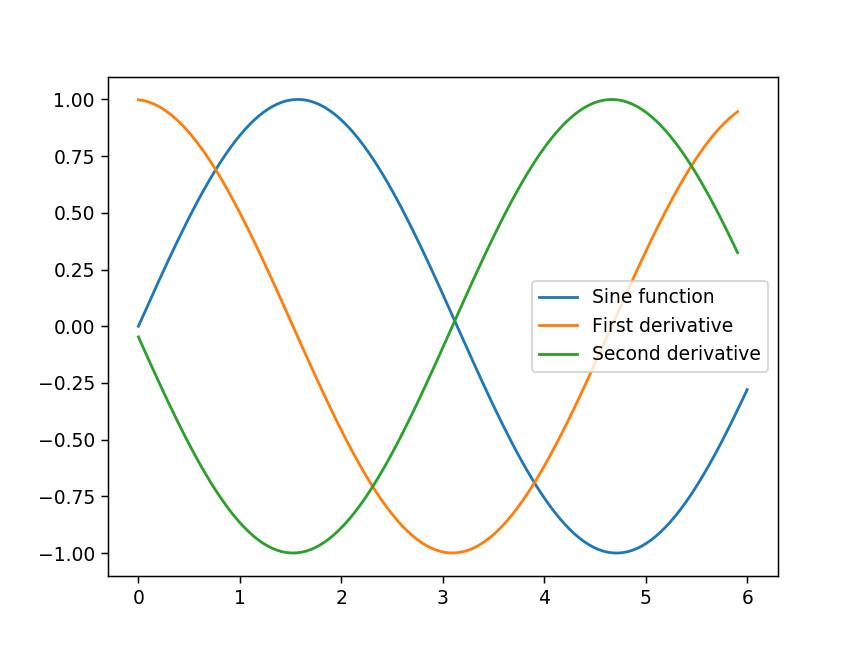

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from pylab import plot, linspace

n = 128
x = np.linspace(0,6,128)

h = x[1]- x[0] #Accurate way to determine the step size 
y = np.sin(x) #The function I'm trying to differntiate

first_derivative_matrix = 1/(2*h) *(np.diag( -1*np.ones(n), 0) + np.diag(np.zeros(n-1),1) + np.diag(np.ones(n-2),2)) 
first_derivative_sin = first_derivative_matrix@y #Mutltipyling the matrix by the function to find the first derivative 

second_derivative_matrix= 1/(h*h) *(np.diag(1*np.ones(n-1), -1) + -2*np.diag(np.ones(n),0) + np.diag(1*np.ones(n-1),1))
second_derivative_sin = second_derivative_matrix@y #Mutltipyling the matrix by the function to find the second derivative 

plt.figure()
plt.plot(x, np.sin(x), label = "Sine function")
plt.plot(x[:-2], first_derivative_sin[:-2], label = "First derivative") #Excluding the last two points
plt.plot(x[:-2], second_derivative_sin[1:-1], label = "Second derivative") #Excluding the first and last points
plt.legend()

### Method for solving the Schrödinger equation

As previously stated the TISE is:

$$ -\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{d x^2}  + V(x)\psi(x) = E\psi(x)$$

Now we have found how to solve the second order differential equation, we can substitute this matrix into the equation:

$$ \frac{d^2\psi(x)}{d x^2} \approx \frac{1}{h^{2}} \begin{pmatrix} 1 & -2 & 1 & \\ & \ddots & \ddots & \ddots  \\ & & 1 & -2 & 1 \end{pmatrix} $$

Furthermore, the matrix for the potential is the values of the potential on the diagonal of the matrix [8]:

$$ \begin{pmatrix} V_1\\ &  V_2\\ & &  \ddots\\ & & &  V_{N-1}\\ & & & &  V_N \end{pmatrix} $$

Substituting and simplifying: 

$$ -\frac{\hbar^2}{2mh^{2}} \begin{pmatrix} 1 & -2 & 1 & \\ & \ddots & \ddots & \ddots  \\ & & 1 & -2 & 1 \end{pmatrix} + \begin{pmatrix} V_1\\ &  V_2\\ & &  \ddots\\ & & &  V_{N-1}\\ & & & &  V_N \end{pmatrix} = E\psi(x)$$

Therefore, the Hamiltonian equals:

$$ \hat H = -\frac{\hbar^2}{2mh^{2}} \begin{pmatrix} 1 & -2 & 1 & \\ & \ddots & \ddots & \ddots  \\ & & 1 & -2 & 1 \end{pmatrix} + \begin{pmatrix} V_1\\ &  V_2\\ & &  \ddots\\ & & &  V_{N-1}\\ & & & &  V_N \end{pmatrix} $$

Taking the transpose of the Hamiltonian: 

In [2]:
np.seterr(divide='ignore', invalid='ignore') #So when dividing by zero there is no error [8]

N = 500 
x = np.linspace(-1,1,N)
h = x[1]-x[0] #step size

hbar=1 #I will be taking hbar to be one
m=1 #I will be taking the mass to be one
V = 0.*x #I will be taking the potential to equal zero

second_diff =  1/(h*h) *(np.diag(1*np.ones(N-1), -1) + -2*np.diag(np.ones(N),0) + np.diag(1*np.ones(N-1),1))
H = -(hbar**2)/(2*m)*second_diff + np.diag(V) #The Hamiltonian matrix 

H_transpose = np.transpose(H) #Finding the transpose of the matrix

symmetric_matrix = np.divide(H_transpose, H) #To see if theses matrices are symmetric the result should be a matrix with ones

print(symmetric_matrix) 

[[ 1.  1. nan ... nan nan nan]
 [ 1.  1.  1. ... nan nan nan]
 [nan  1.  1. ... nan nan nan]
 ...
 [nan nan nan ...  1.  1. nan]
 [nan nan nan ...  1.  1.  1.]
 [nan nan nan ... nan  1.  1.]]


From this we can see that that this is a symmetric matrix as: $ \hat H = \hat H^{T} $. Furthermore, since the Hamiltonian does not contain any imaginary numbers, the complex conjugate of this matrix is real: $ \hat H = \hat H^{*} $. Therefore from the definition of a Hermitian matrix: $ A^{\dagger} = (A^{T})^{*} $, we can determine that the Hamiltonian is also Hermitian:  $ \hat H = \hat H^{\dagger} $. Thus, the eigenvalues must be real, which makes sense since energy is always a real number [10]. 

Therefore, due to the fact that the Hamiltonian is Hermitian and symmetric we can use `np.linalg.eigh` [11] to find the eigenvalues and eigenvectors of this matrix. This algorithm will return a 1-D array containing the eigenvalues of the matrix, and a 2-D square matrix. Thus we can find the solutions to the Schrödinger equation. 

## Results

### Infinite Square Well

Consider a potential where:

**Outside** the well: V = $\infty$, $\psi(x) = 0 \begin{cases} x \geq  L \\ x \leq  -L \end{cases} $ and **inside** the well: V = 0

This potential can be seen on the plot below, where I have taken $ L =  \pm 1$. 

<IPython.core.display.Javascript object>


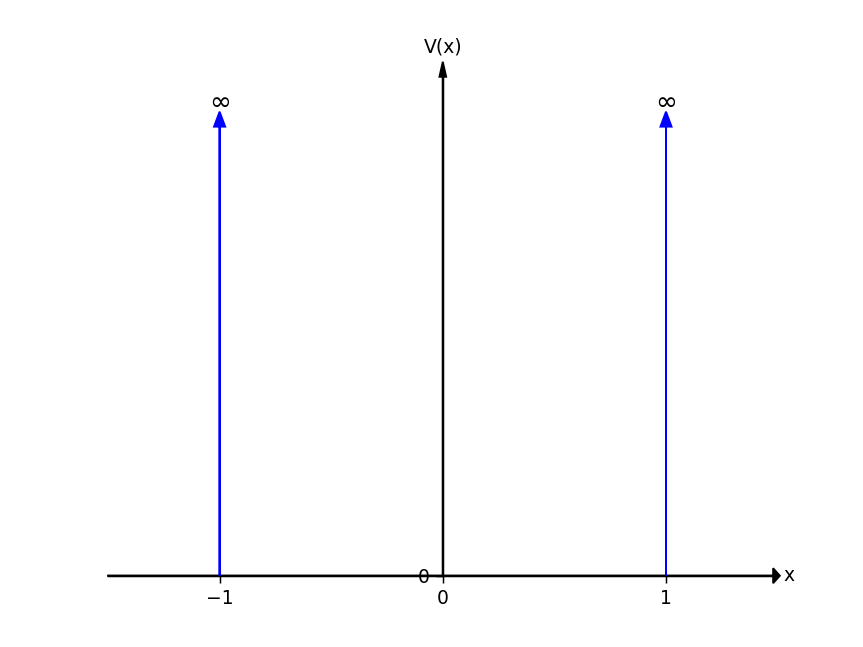

Text(1,0.95,'$\\infty$')

In [3]:
plt.figure()
ax = plt.axes()
plt.xlim((-1.5,1.5)) #Setting up the x limits 

ax.spines['left'].set_position(('data', 0.0)) #Removing the box around the plot
ax.spines['bottom'].set_position(('data', 0.0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.xticks(np.arange(-1, 2,1)) #Only showing the limits of x
plt.yticks(np.arange(0,1,1)) #Only showing limints of y

plt.arrow(-1.5, 0, 2.98, 0, width=0.0005, color="k", clip_on=False, head_width=0.03, head_length=0.03) #x-axis arrow
plt.arrow(0, 0, 0, 1, width=0.0005, color="k", clip_on=False, head_width=0.03, head_length=0.03) #y-axis arrow

plt.arrow(-1, 0, 0, 0.9, width=0.0005, color="b", clip_on=False, head_width=0.05, head_length=0.03) #infinity arrows
plt.arrow(1, 0, 0, 0.9, width=0.0005, color="b", clip_on=False, head_width=0.05, head_length=0.03)

plt.text(0, 1.06, "V(x)" , va='center', ha='center') #Labelling 
plt.text(1.55, 0, "x" , va='center', ha='center')
plt.text(-1, 0.95, "$\infty$" , va='center', ha='center', fontsize=14)
plt.text(1, 0.95, "$\infty$" , va='center', ha='center', fontsize=14)

Using the Hamiltonian matrix as well as `np.linalg.eigh` stated in the method section to find the solutions to the infinite square well in the region $ -1 \leq \ x \leq \ 1 $:

In [4]:
hbar=1 #I will be taking hbar to be one
m=1 #I will be taking the mass to be one
N = 500
x = np.linspace(-1,1,N)
h = x[1]-x[0] #Substracting the first value of x from the second, to get an accurate step size
V_inf = 0.*x #The potential equals zero

second_diff =  1/(h*h) *(np.diag(1*np.ones(N-1), -1) + -2*np.diag(np.ones(N),0) + np.diag(1*np.ones(N-1),1))
H = -(hbar**2)/(2*m)*second_diff + np.diag(V_inf) #The Hamiltonian matrix

In [5]:
eigenvalues_inf, eigenvectors = np.linalg.eigh(H) 
eigenvectors_inf = np.transpose(eigenvectors) #The transpose of the eigenvectors must be taken 

<IPython.core.display.Javascript object>


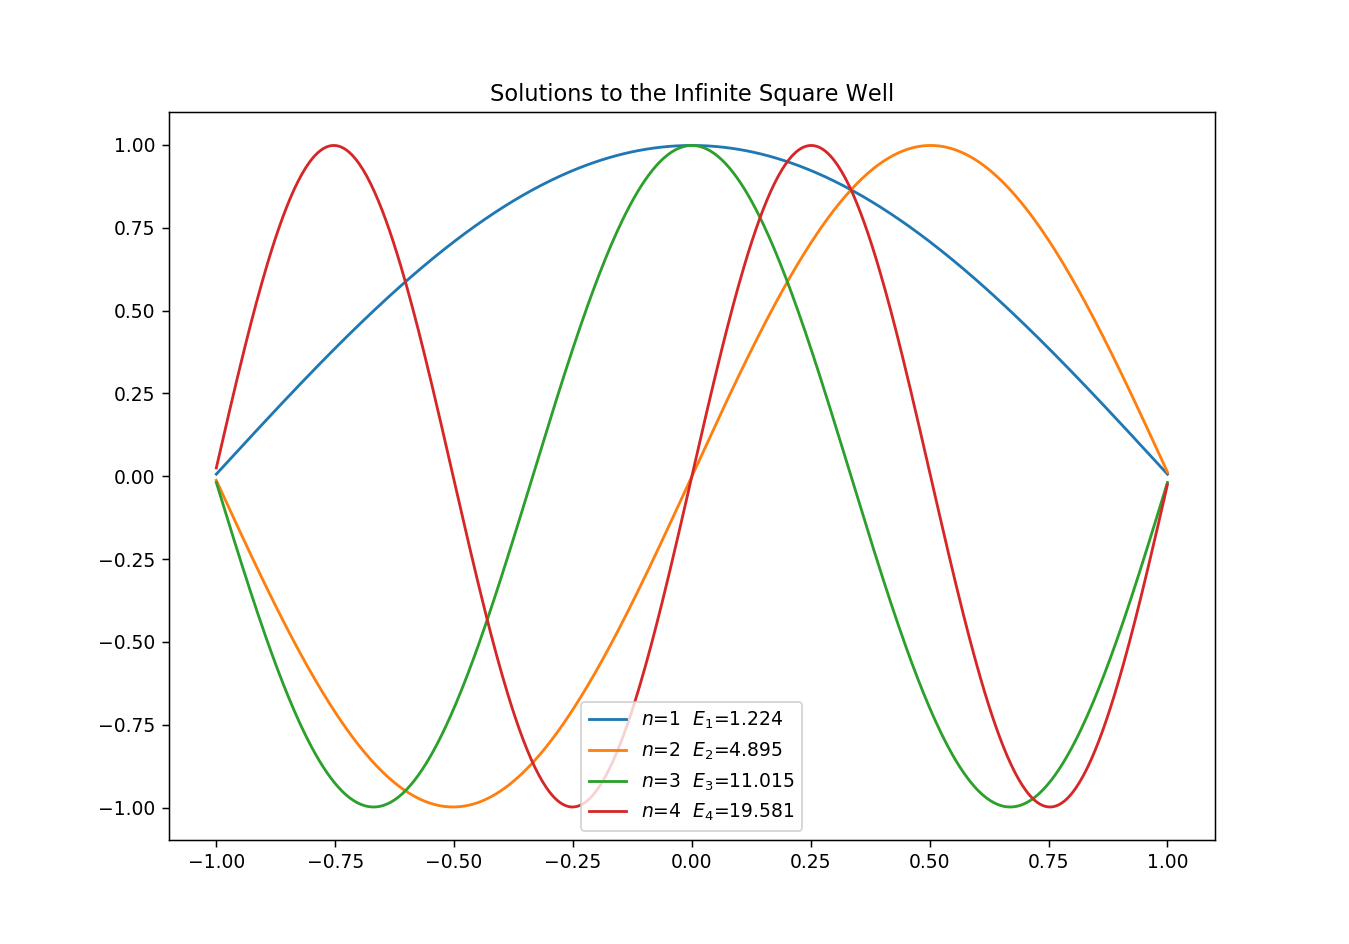

In [6]:
plt.figure(figsize=(10,7)) #I made the figure bigger because the legend was blocking the view of the plots 

for i in range(4): #Number of wavefunctions to plot
    n = i + 1
    if n == 3: #Energy level 3 needs a seperate condition
        plt.plot(x,eigenvectors_inf[i]/np.sqrt(h),label="$n$={}  $E_{}$={:.3f}".format(n,n,eigenvalues_inf[i])) 
    elif n % 2 == 0: #Even energy levels 
        plt.plot(x,eigenvectors_inf[i]/np.sqrt(h),label="$n$={}  $E_{}$={:.3f}".format(n,n,eigenvalues_inf[i]))
    else: #Odd energy levels 
        plt.plot(x,-eigenvectors_inf[i]/np.sqrt(h),label="$n$={}  $E_{}$={:.3f}".format(n,n,eigenvalues_inf[i]))

plt.title("Solutions to the Infinite Square Well")
plt.legend()

### Finite Square Well

Consider a potential where the particle has energy $ E $, less than $ V_0 $, and is bound to a well. This is shown in the figure below, with depth $ V_0 $ and width $ L $. I have taken $ V_0 = 2 $ and $ L =  \pm 2$. 

In [7]:
N = 4000 #For this method to work a large value of N, to have a large number of steps
L = 2.0 #The size of the well 
x = np.linspace(-100,100,N) #This value needs to be much larger than the value of L
h = x[1]-x[0] #Calculating step size

V0 = 2 #Depth of the well 
V_fin =np.zeros(N) #Calculating the potential 
for i in range(N):
    if x[i] >= -L and x[i] <= L: #So the potential is 0 between -L and L
        V_fin[i]= 0
    else:
        V_fin [i] = V0 #The potential is 2 outside of the well

<IPython.core.display.Javascript object>


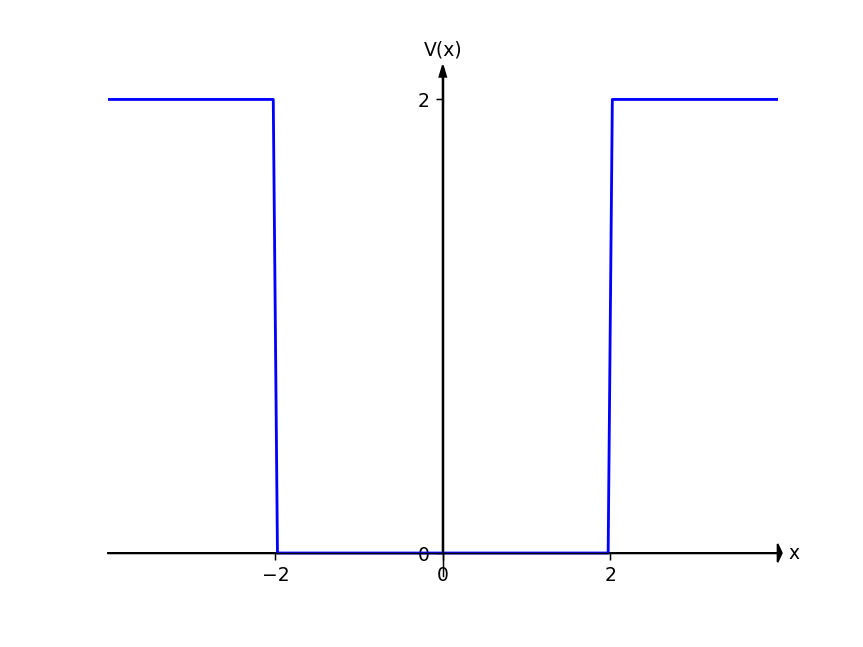

Text(4.2,0,'x')

In [8]:
plt.figure()
ax = plt.axes()
plt.xlim((-4,4)) #Limit of x values
plt.plot(x,V_fin,"b-")

ax.spines['left'].set_position(('data', 0.0)) #Removing the box around the plot 
ax.spines['bottom'].set_position(('data', 0.0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.xticks(np.arange(-2,3,2)) #Only showing the limits of x
plt.yticks(np.arange(0,3,2)) #Only showing the value of V0

plt.arrow(-4, 0, 8, 0, width=0.0005, color="k", clip_on=False, head_width=0.08, head_length=0.05) #x-axis arrow
plt.arrow(0, 0, 0, 2.1, width=0.0005, color="k", clip_on=False, head_width=0.08, head_length=0.05) #y-axis arrow
plt.text(0, 2.22, "V(x)" , va='center', ha='center') #Labelling 
plt.text(4.2, 0, "x" , va='center', ha='center')

Again, like previously I used the Hamiltonian matrix as well as `np.linalg.eigh` to find the solutions to the finite square well:

In [9]:
hbar=1
m=1
second_diff =  1/(h*h) *(np.diag(1*np.ones(N-1), -1) + -2*np.diag(np.ones(N),0) + np.diag(1*np.ones(N-1),1))
H = -(hbar**2)/(2*m)*second_diff + np.diag(V_fin) #The Hamiltonian matrix

eigenvalues_fin, eigenvectors = np.linalg.eigh(H) 
eigenvectors_fin = np.transpose(eigenvectors) #The transpose of the eigenvectors must be taken 

<IPython.core.display.Javascript object>


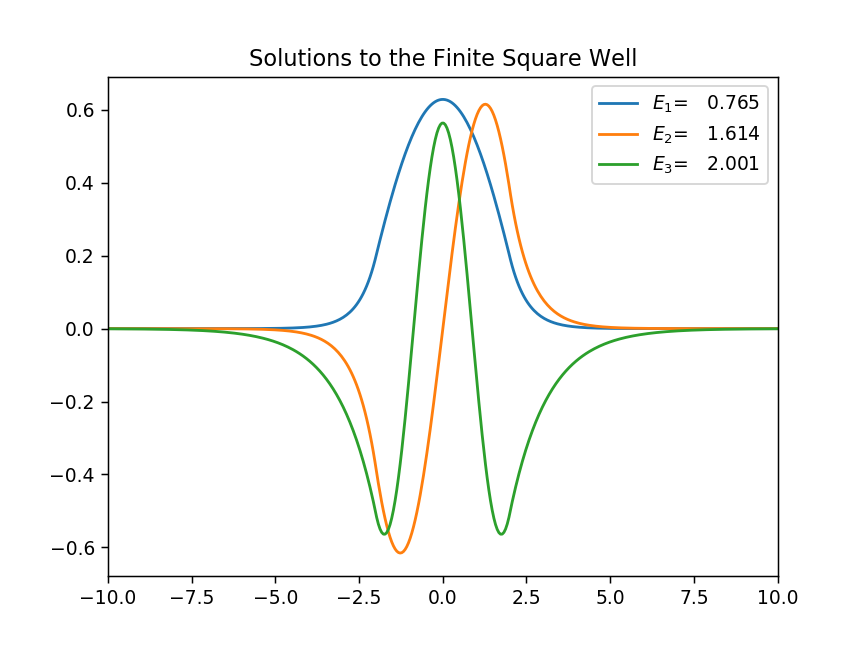

In [10]:
plt.figure()
plt.xlim((-10,10)) #Choosing a large range for x to see what happens to the wave function at the barrier

for i in range(3): #Plotting 3 energy levels
    n = i + 1
    if n % 2 == 0: #Even energy levels                
        plt.plot(x,eigenvectors_fin[i]/np.sqrt(h),label="$E_{}$={:>8.3f}".format(n,eigenvalues_fin[n]))
    else: #Odd energy levels
        plt.plot(x,-eigenvectors_fin[i]/np.sqrt(h),label="$E_{}$={:>8.3f}".format(n,eigenvalues_fin[n]))
        
plt.title("Solutions to the Finite Square Well")
plt.legend()
plt.show()

## Quantum Harmonic Oscillator

The potential energy of a **harmonic oscillator** is:

$$ V(x) = \frac{1}{2}m\omega^{2}x^{2} $$

This potential is time independent, so we can substitute this into the TISE:

$$ -\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{d x^2}  + \frac{1}{2}m\omega^{2}x^{2}\psi(x) = E\psi(x)$$

This potential can be seen in the plot below.

<IPython.core.display.Javascript object>


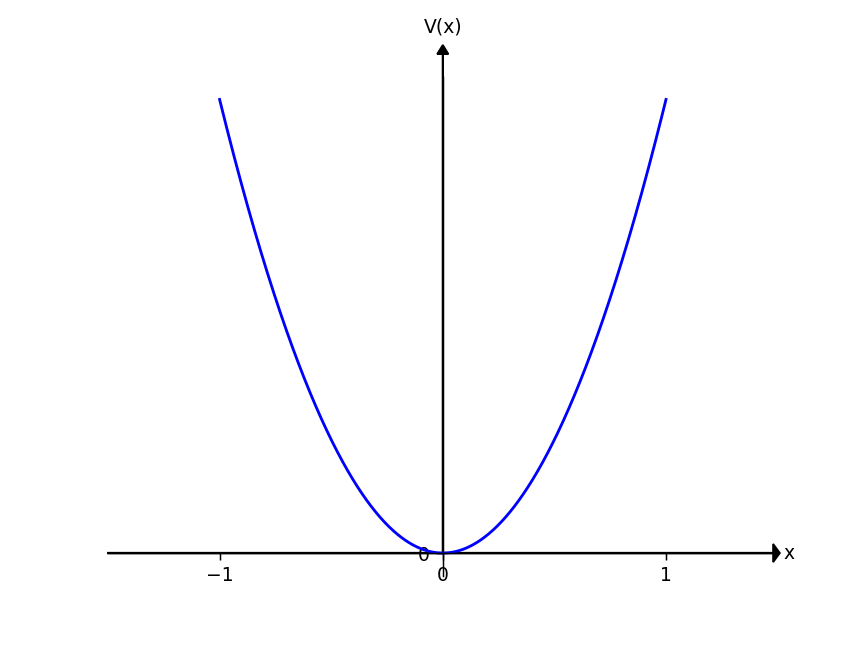

Text(1.55,0,'x')

In [11]:
N = 2000
omega = 1 #I will be taking the value of omega to be 1
x = np.linspace(-1,1,N)
h = x[1]-x[0] 
V_har = 0.5*m*(omega**2)*(x**2) #Formula for the potential energy of a harmonic oscillator

plt.figure()
ax = plt.axes()
plt.xlim((-1.5,1.5))
plt.plot(x,V_har,"b-")

ax.spines['left'].set_position(('data', 0.0)) #Removing the box around the plot 
ax.spines['bottom'].set_position(('data', 0.0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.xticks(np.arange(-1, 2,1)) #Only showing the limits of x
plt.yticks(np.arange(0,0.5,1)) #Show no V(x) values

plt.arrow(-1.5, 0, 2.98, 0, width=0.0005, color="k", clip_on=False, head_width=0.02, head_length=0.03) #x-axis arrow
plt.arrow(0, 0, 0, 0.55, width=0.0005, color="k", clip_on=False, head_width=0.05, head_length=0.01) #y-axis arrow

plt.text(0, 0.58, "V(x)" , va='center', ha='center') #Labelling 
plt.text(1.55, 0, "x" , va='center', ha='center')

Using the Hamiltonian matrix as well as `np.linalg.eigh` stated in the method section to find the solutions to the quantum harmonic oscillator:

In [12]:
N = 2000
omega = 1

x = np.linspace(-10,10,N) #This value needs to be large so the plotting is better
h = x[1]-x[0] #step size

V_har = 0.5*m*(omega**2)*(x**2) #Formula for the potential energy of a harmonic oscillator

In [13]:
second_diff =  1/(h*h) *(np.diag(1*np.ones(N-1), -1) + -2*np.diag(np.ones(N),0) + np.diag(1*np.ones(N-1),1))
H = -(hbar**2)/(2*m)*second_diff + np.diag(V_har) #The Hamiltonian matrix

In [14]:
eigenvalues_har, eigenvectors = np.linalg.eigh(H) 
eigenvectors_har = np.transpose(eigenvectors) #The transpose of the eigenvectors must be taken 

<IPython.core.display.Javascript object>


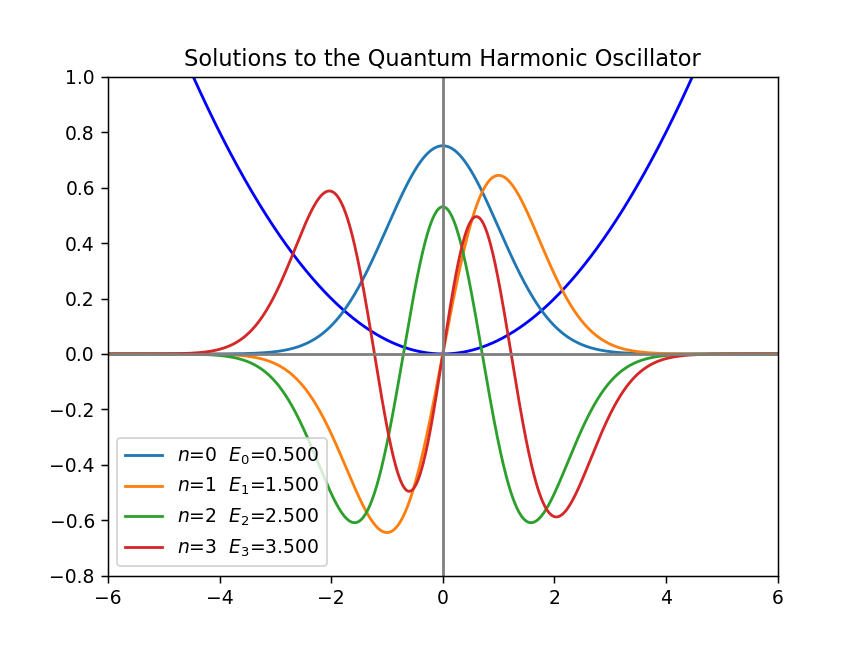

In [15]:
plt.figure() 
plt.plot(x,0.1*V_har,"b-") #Multiply the potential by 0.1 to scale the potential, so it looks bettwe on the plot

for i in range(4): #Number of wavefunctions to plot
    n = i
    if n % 2 == 0: #Even energy levels 
        plt.plot(x,-eigenvectors_har[i]/np.sqrt(h),label="$n$={}  $E_{}$={:.3f}".format(n,n,eigenvalues_har[i]))
    else: #Odd energy levels 
        plt.plot(x,eigenvectors_har[i]/np.sqrt(h),label="$n$={}  $E_{}$={:.3f}".format(n,n,eigenvalues_har[i]))

plt.title("Solutions to the Quantum Harmonic Oscillator")
plt.plot([0,0],[-6,6],color="grey") #x-axis line
plt.plot([-10,10],[0,0],color="grey") #y-axis line
plt.ylim((-0.8,1))
plt.xlim((-6,6))
plt.legend()

## Discussion

### Comparing the calculated solutions to the known solutions

#### The solutions to the infinite square well

The solutions to the infinite square well are: 

For n **odd**:

$ \psi_n = \sqrt{\frac{2}{L}}\cos\Big(\frac{n\pi}{L}x\Big) $

For n **even**:

$ \psi_n = \sqrt{\frac{2}{L}}\sin\Big(\frac{n\pi}{L}x\Big) $

I plotted these solutions to compare to the solutions I calculated previously: 

<IPython.core.display.Javascript object>


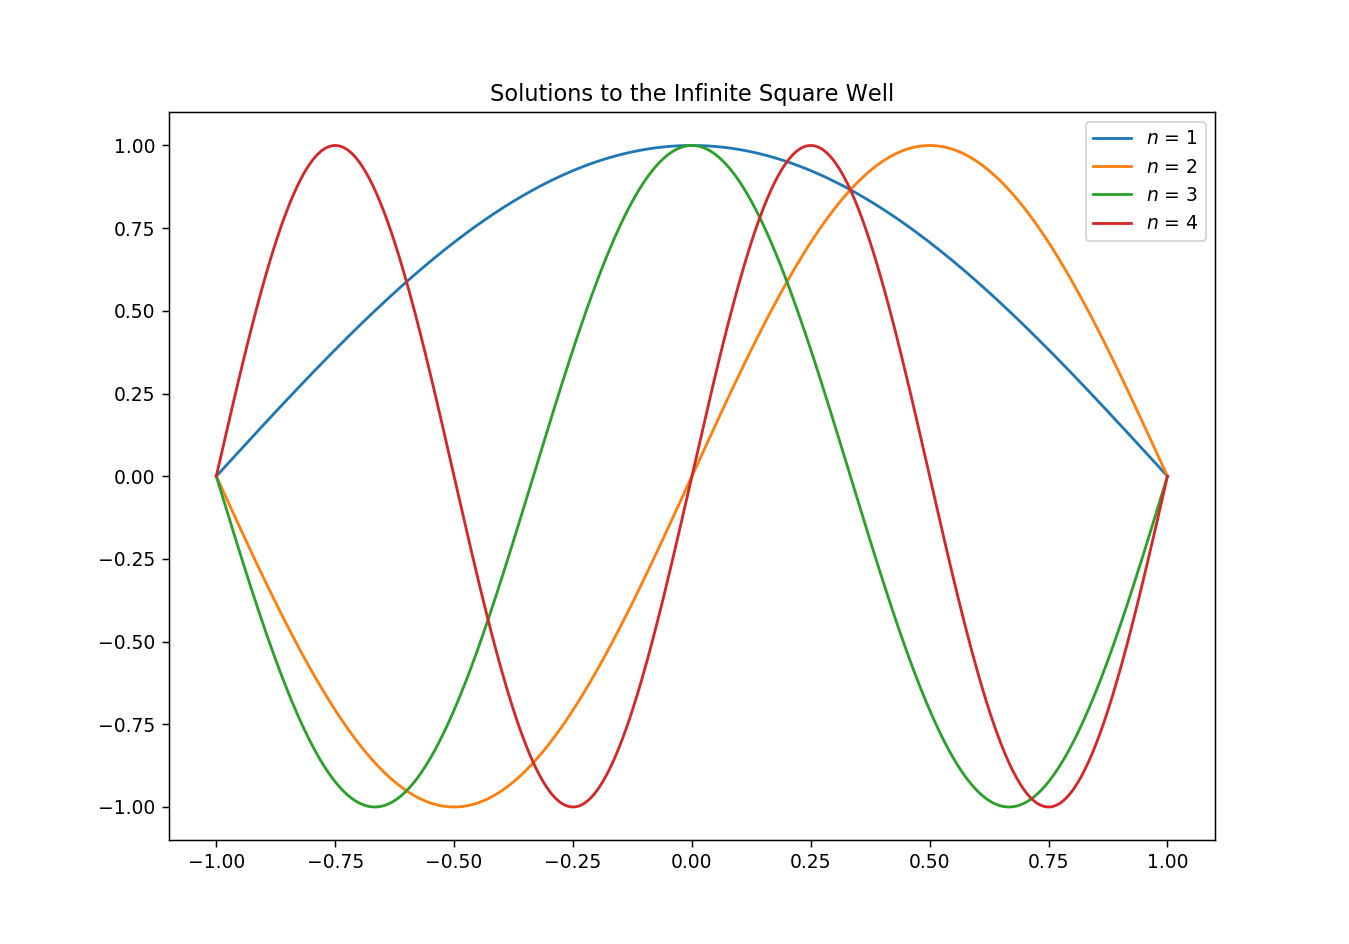

In [16]:
from math import sqrt

N = 500
x = np.linspace(-1,1,N)
L = 2 #Length of range of x

def actual_solutions_infy(n,x=np.linspace(-1,1,N)):
    if n % 2 == 0: #Even energy levels
        wave_function = sqrt(2/L)*np.sin((n*np.pi*x)/L)
    else: # Odd energy levels 
        wave_function = sqrt(2/L)*np.cos((n*np.pi*x)/L)
        
    return wave_function

plt.figure(figsize=(10,7)) #I made the figure bigger again so comparing these two plots would be easier

for i in range(4):
    n = i + 1
    plt.plot(x,actual_solutions_infy(n,x), label = "$n$ = {}".format(n)) #Plotting the solutions
    
plt.title("Solutions to the Infinite Square Well")
plt.legend()

This is a strength of my code because, as you can see, the solutions I found through solving Schrödinger equation for the infinite square well, are the same as the solutions already known. Therefore, the values found for the eigenfunctions must be correct. However a weakness of my code is that, I had to include a separate condition when plotting the wavefunction for $n=3$ so that the eigenvector for $n=3$ plots correctly. 

#### Energy Levels of the infinite square well

The energy levels on the infinite square well can be found using the equation: $$ E_n = \frac{n^2\pi^2\hbar^2}{2mL^2}$$

Plotting these energy levels:

<IPython.core.display.Javascript object>


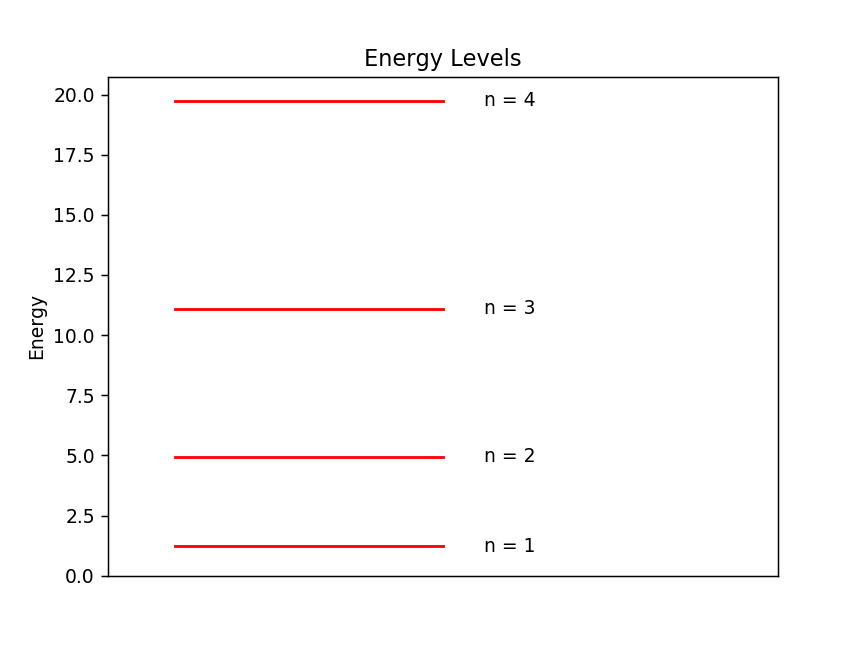

In [17]:
L = 0.5 #Using L = 2 does not work 

plt.figure()
ax = plt.axes()
ax.set_ylabel('Energy')
ax.set_title('Energy Levels')

for i in range(4):
    n = i+1 #Energy level 
    energy = (n**2)*(np.pi**2)*(hbar**2)/2*m*(L**2) #Calculating the energy
    plt.ylim(0,energy+1) #y limit 
    plt.axhline(energy, xmin=0.1, xmax=0.5,  color='red') #To plot the horizontal lines 
    plt.text(0.6, energy, "n = {}".format(n) , va='center', ha='center') #Plot the text (n=...)
    ax.axes.get_xaxis().set_visible(False) #Remove the x-values on the plot

Now comparing the calculalted values of the energy levels to the energy levels known: 

In [18]:
print("n", "\t", "Energy Found", "\t", "Energy Calculated", "\t", "Difference")     #Table column headings
print("---", "\t", "-------------", "\t", "------------------", "\t", "-------------") 

for i in range(10): #Testing a large range to see how the error changes 
    n = i+1
    energy = (n**2)*(np.pi**2)*(hbar**2)/2*m*(L**2) #Calculating the energy
    print(n, "\t", round(eigenvalues_inf[i],6) ,"\t", round(energy,6), "\t", "\t", round(energy-eigenvalues_inf[i],6)) 

n 	 Energy Found 	 Energy Calculated 	 Difference
--- 	 ------------- 	 ------------------ 	 -------------
1 	 1.223866 	 1.233701 	 	 0.009834
2 	 4.895417 	 4.934802 	 	 0.039385
3 	 11.014508 	 11.103305 	 	 0.088797
4 	 19.580898 	 19.739209 	 	 0.158311
5 	 30.594251 	 30.842514 	 	 0.248262
6 	 44.054134 	 44.41322 	 	 0.359086
7 	 59.960017 	 60.451327 	 	 0.49131
8 	 78.311275 	 78.956835 	 	 0.64556
9 	 99.107186 	 99.929745 	 	 0.822559
10 	 122.346933 	 123.370055 	 	 1.023122


This is a strength of my code because, from these results it shows that there is only a small error between the energy calculated and the energy found. Therefore, this shows that the eigenvalues found were correct. However, a weakness of my code is that as the energy level increases the accuracy of the energy levels found by the program decreases. This can been seen by comparing the difference found at $n = 1$ and $n = 10$; the difference in error is 1.013288. Nevertheless, this error can be reduced by increasing the step size, $ N$ used:

In [19]:
N = 4000 #New value for N
x = np.linspace(-1,1,N)
h = x[1]-x[0] #New step size
V_inf = 0.*x #Potential for infinite square well

second_diff =  1/(h*h) *(np.diag(1*np.ones(N-1), -1) + -2*np.diag(np.ones(N),0) + np.diag(1*np.ones(N-1),1))
H = -(hbar**2)/(2*m)*second_diff + np.diag(V_inf) #The Hamiltonian matrix

eigenvalues_inf, eigenvectors = np.linalg.eigh(H)  

print("n", "\t", "Energy Found", "\t", "Energy Calculated", "\t", "Difference")     
print("---", "\t", "-------------", "\t", "------------------", "\t", "-------------") 

for i in range(10): 
    n = i+1
    energy = (n**2)*(np.pi**2)*(hbar**2)/2*m*(L**2) #Calculating the energy
    print(n, "\t", round(eigenvalues_inf[i],6) ,"\t", round(energy,6), "\t", "\t", round(energy-eigenvalues_inf[i],6)) 

n 	 Energy Found 	 Energy Calculated 	 Difference
--- 	 ------------- 	 ------------------ 	 -------------
1 	 1.232467 	 1.233701 	 	 0.001233
2 	 4.929869 	 4.934802 	 	 0.004933
3 	 11.092202 	 11.103305 	 	 0.011103
4 	 19.719463 	 19.739209 	 	 0.019746
5 	 30.811647 	 30.842514 	 	 0.030867
6 	 44.368747 	 44.41322 	 	 0.044473
7 	 60.390754 	 60.451327 	 	 0.060573
8 	 78.877658 	 78.956835 	 	 0.079177
9 	 99.829449 	 99.929745 	 	 0.100295
10 	 123.246113 	 123.370055 	 	 0.123942


As you can see, the results for the energy levels become more accurate as the step size increases, as this reduces arithmetic error.

#### The solutions to the finite square well

The solutions to the finite square well are: 

For **even parity**:

$$ \psi(x) = \begin{cases} e^{nx} \quad x \leq  -L \\ \cos(nx) \quad -L < x < L \\ e^{-nx} \quad x \geq  -L \end{cases} $$

For **odd parity**:

$$ \psi(x) = \begin{cases} e^{nx} \quad x \leq  -L \\ \sin(nx) \quad -L < x < L \\ e^{-nx} \quad x \geq  -L \end{cases} $$

I plotted these solutions to compare to the solutions I calculated previously. I created by own legend by using `mpatches.Patch` [12]

<IPython.core.display.Javascript object>


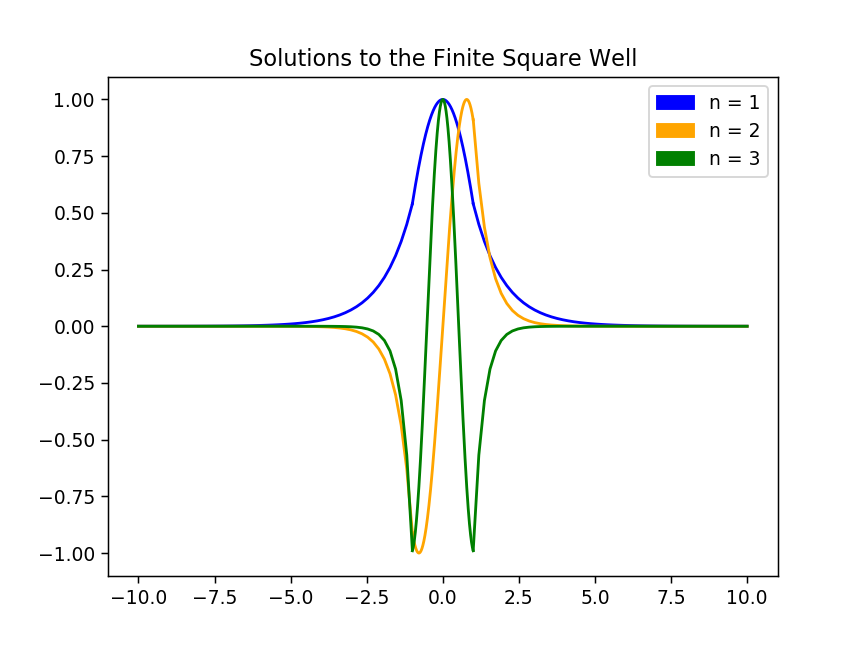

In [20]:
import matplotlib.patches as mpatches

N = 4000
plt.figure() 

x = np.linspace(-1,1,N) #x values for the cos and sin functions
x1 = np.linspace(-10,-1) #x values for e^nx
x2 = np.linspace(1,10) #x values for e^-nx

#I plotted each part of the wavefunction separately, and joined them together by scaling the exponential functions to connect 
#the sin and cos functions

plt.plot(x, np.cos(1*x), x1, 1.4675*np.exp(1*x1), x2, 1.4675*np.exp(-1*x2), color='blue') #For n = 1
plt.plot(x, np.sin(2*x), x1, -6.725*np.exp(2*x1), x2, 6.725*np.exp(-2*x2), color='orange')#For n = 2
plt.plot(x, np.cos(3*x), x1, -19.8*np.exp(3*x1), x2, -19.8*np.exp(-3*x2), color='green')#For n = 3

plt.title("Solutions to the Finite Square Well")

n_1_label = mpatches.Patch(color='blue', label='n = 1') #Making the legend 
n_2_label = mpatches.Patch(color='orange', label='n = 2')
n_3_label = mpatches.Patch(color='green', label='n = 3')

plt.legend(handles=[n_1_label, n_2_label, n_3_label])

This is a strength of my code because, as you can see the three wavefunctions are the same as the ones I calculated. However, a weakness of my code is that I am unable to plot wavefunctions higher than three. This is because these wavefunctions, $n=1,2,3$, satisfy the boundary conditions, which are the well depth and width also, the energy of these wavefunctions are less than the potential energy. Furthermore, in order for this program to work there needs to be a large step size, $ N $. Due to this, it takes quite some time for the code to run. 

#### The solutions to the Quantum Harmonic Oscillator

The general solution to the quantum harmonic oscillator is:

$$ \psi(x) = A_ne^{-a \frac{x^{2}}{2}}H_n(z) $$

Where:

$$ a = \frac{m\omega_0}{\hbar} $$

$$ z = \sqrt{a}x $$

$ H_n $ is the Hermite polynomial:

$$ H_n(z) = (-1)^{n} e^{z^{2}} \frac{d^{n}(e^{-z^{2}})}{dz^{n}} $$

$A_n$ are the normalisation constants: 

$$ A_n = \Big(\frac{a}{\pi}\Big)^{\frac{1}{4}} \Big(\frac{1}{2^{n}n!}\Big)^{\frac{1}{2}} $$

I used to this plot the general solutions o the quantum harmonic oscillator, to compare to the solutions calculated. I found the Hermite polynomials by using `scipy.special.eval_hermite` [13][14] which evaluates the Hermite polynomials at the point z. Then I created a function to find the normalisation constants. Lastly, I substituted both of these function into the general solution to the quantum harmonic oscillator. 

<IPython.core.display.Javascript object>


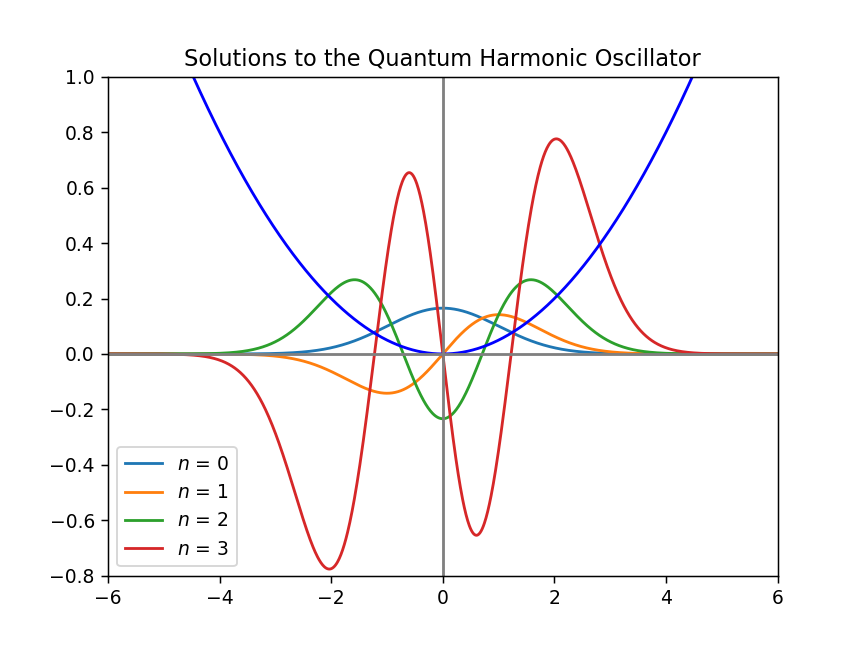

In [21]:
from math import factorial
import scipy.special as special

plt.figure()
N =2000
x = np.linspace(-10,10,N)
a = (m*omega)/hbar #Defining a
z = sqrt(a)*x #Defining z

def Hermite(n): #Calculating the Hermite polynomials 
    return special.eval_hermite(n,z) 

def normalisation_constant(n): #Calculating the normalisations constants
    return ((a/np.pi)**(0.25)) * ((1/(2**n)*factorial(n))**0.5)

def solution_oscillator(n): #Calculating ther general solutions
    return normalisation_constant(n)*np.exp(-a*((x**2)/2))*Hermite(n)

for i in range(4): #Plotting the solutions 
    n = i
    plt.plot(x,0.22*solution_oscillator(n), label = "$n$ = {}".format(n)) #Had to multiply the solutions by 0.22, 
                                                                          #so the plot scaled nicely
    
plt.title("Solutions to the Quantum Harmonic Oscillator")
plt.plot(x,0.1*V_har,"b-") #Plotting the potential
plt.plot([0,0],[-6,6],color="grey") #Plotting the extra x-axis
plt.plot([-10,10],[0,0],color="grey") #Plotting the extra y-axis
plt.ylim((-0.8,1)) #Limits for y
plt.xlim((-6,6)) #Limits for x
plt.legend()

This is a strength of my code because, the solutions for the first two energy levels I found through solving Schrödinger equation for the quantum harmonic oscillator, are the same as the solutions already known. However a weakness of my code is that, the known wavefunctions for $ n = 2,3 $ are different than the ones I calculated. This is because my calculated wavefunctions appear to be a reflection of the known wavefunctions. 

#### Energy Levels 

The energy levels on the quantum harmonic oscillator can be found using the equation: $$ E_n = \hbar\omega_0 \Big(n + \frac{1}{2} \Big) $$

Therefore, plotting these energy levels:

<IPython.core.display.Javascript object>


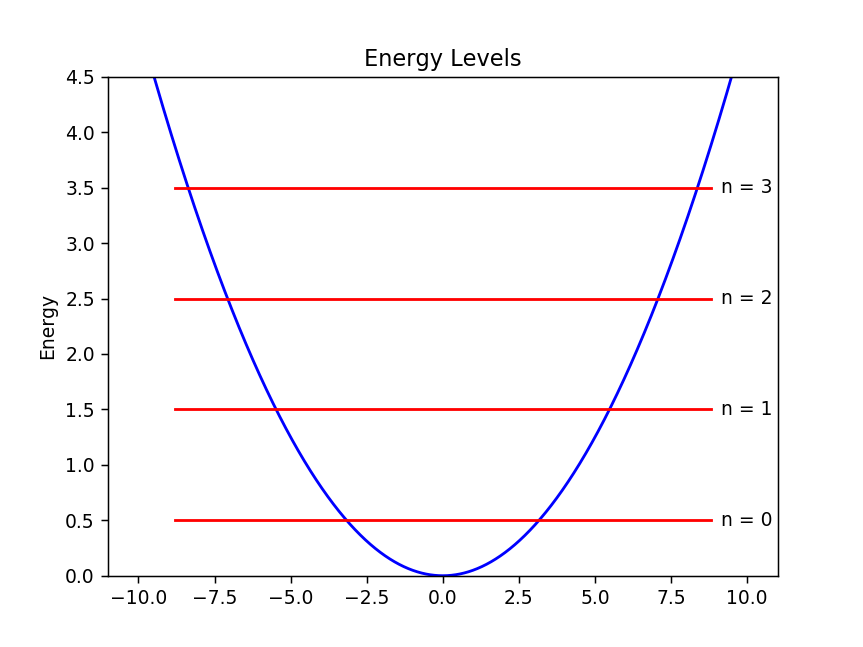

In [22]:
plt.figure()
plt.plot(x,0.1*V_har,"b-")
plt.ylabel('Energy')
plt.title('Energy Levels')

for i in range(4):
    n = i #Energy level 
    energy = (hbar*omega)*(n + 0.5) #Calculating the energy
    plt.ylim(0,energy+1) #y limit 
    plt.axhline(energy, xmin=0.1, xmax=0.9,  color='red') #To plot the horizontal lines 
    plt.text(10, energy, "n = {}".format(n) , va='center', ha='center') #Plot the text (n=...)

Now comparing the calculalted values of the energy levels to the energy levels known:

In [23]:
print("n", "\t", "Energy Found", "\t", "Energy Calculated", "\t", "Difference")     #Table column headings
print("---", "\t", "-------------", "\t", "------------------", "\t", "-------------") 

for i in range(11): #Testing a large range to see how the error changes 
    n = i
    energy = (hbar*omega)*(n + 0.5)
    print(n, "\t", round(eigenvalues_har[i],6),"\t", round(energy,6), "\t", "\t", "\t", round(energy-eigenvalues_har[i],6)) 

n 	 Energy Found 	 Energy Calculated 	 Difference
--- 	 ------------- 	 ------------------ 	 -------------
0 	 0.499997 	 0.5 	 	 	 3e-06
1 	 1.499984 	 1.5 	 	 	 1.6e-05
2 	 2.499959 	 2.5 	 	 	 4.1e-05
3 	 3.499922 	 3.5 	 	 	 7.8e-05
4 	 4.499872 	 4.5 	 	 	 0.000128
5 	 5.499809 	 5.5 	 	 	 0.000191
6 	 6.499734 	 6.5 	 	 	 0.000266
7 	 7.499647 	 7.5 	 	 	 0.000353
8 	 8.499546 	 8.5 	 	 	 0.000454
9 	 9.499434 	 9.5 	 	 	 0.000566
10 	 10.499309 	 10.5 	 	 	 0.000691


This is a strength of my code because, from these results it shows that there is only a small error between the energy calculated and the energy found. Therefore, this shows that the eigenvalues found were correct. However, again like when calculating the energy levels for the infinite square well, a weakness of my code is that as the energy levels increases the accuracy of the energy levels found by the program decreases. This error can be reduced by increasing the step size as seen below, however this does increase the time is takes for the program to run.

In [24]:
N = 4000 #New value for N
x = np.linspace(-10,10,N)
h = x[1]-x[0] #New step size
V_har = 0.5*m*(omega**2)*(x**2) #Potential for harmonic oscillator 

second_diff =  1/(h*h) *(np.diag(1*np.ones(N-1), -1) + -2*np.diag(np.ones(N),0) + np.diag(1*np.ones(N-1),1))
H = -(hbar**2)/(2*m)*second_diff + np.diag(V_har) 

eigenvalues_har, eigenvectors = np.linalg.eigh(H)  

print("n", "\t", "Energy Found", "\t", "Energy Calculated", "\t", "Difference")     
print("---", "\t", "-------------", "\t", "------------------", "\t", "-------------") 

for i in range(10): 
    n = i
    energy = (hbar*omega)*(n + 0.5) #Calculating the energy
    print(n, "\t", round(eigenvalues_har[i],6) ,"\t", round(energy,6), "\t", "\t","\t", round(energy-eigenvalues_har[i],6)) 

n 	 Energy Found 	 Energy Calculated 	 Difference
--- 	 ------------- 	 ------------------ 	 -------------
0 	 0.499999 	 0.5 	 	 	 1e-06
1 	 1.499996 	 1.5 	 	 	 4e-06
2 	 2.49999 	 2.5 	 	 	 1e-05
3 	 3.49998 	 3.5 	 	 	 2e-05
4 	 4.499968 	 4.5 	 	 	 3.2e-05
5 	 5.499952 	 5.5 	 	 	 4.8e-05
6 	 6.499934 	 6.5 	 	 	 6.6e-05
7 	 7.499912 	 7.5 	 	 	 8.8e-05
8 	 8.499887 	 8.5 	 	 	 0.000113
9 	 9.499859 	 9.5 	 	 	 0.000141


## Conclusion

In conclusion, I was able to find solutions to the Schrödinger equation for the infinite square well, finite square well and quantum harmonic oscillator. Furthermore, I was able to plot the wavefunctions and stated the corresponding energy values. The strengths of my chosen approach is that, the central difference algorithm was easy to implement, and was a concise way of calculating the second order differential in the TISE. A limiting factor of this algorithm is that the accuracy depended on the step size $ h $ .Therefore, I used a large step size in my calculations but this meant that the program took longer to run. Another strength of my chosen approach is that I used `np.linalg.eigh`, which was a sensible algorithm to use because the Hamiltonian matrix is Hermitian and symmetric, so the eigenvectors and eigenvalues could be calculated easily. However, a weakness to this chosen approach is that, it was sometimes difficult to plot the wavefunctions correctly. For example, for the infinite square well I had to include a separate condition when plotting the energy level $ n = 3$. Another strength of my chosen approach is that, I was able to apply this method easily to the different systems, since the definition of the potential could be changed for that specific system. Future work that may be done on this topic are: this method could be used to find the solutions of the TISE for the double finite square well. This could be done by changing the value for the potential to include two wells, and repeating the method of finding the eigenvectors and eigenvalues. In addition to that, a finite potential barrier could be investigated in a similar way to the finite square well, however the potential will be different. Not only could this program be used for quantum mechanical systems, but for mathematical problems involving eigenvalue equations. However, the eigenfunction used must be either Hermitian or symmetric. 

## References

[1] 'Quantum Mechanics' by B.H. Bransden and C.J. Joachain, 2000, 2nd edition

[2] Quantum Mechanics A Introduction lecture notes, Dr Timothy Clifton, Accessed 01/01/19

[[3](https://en.wikipedia.org/wiki/Finite_difference)] Wikipedia, the free encyclopedia, Accessed 01/01/19

[[4](http://www.maths.lth.se/na/courses/FMN130/media/material/Chapter4.08a__.pdf)] Numerical Methods for Differential Equationsa by Gustaf Soderlind and Carmen Arevalo, Accessed 01/01/19

[[5](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.diag.html)] numpy.diag, Accessed 01/01/19

[[6](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)] numpy.ones, Accessed 01/01/19

[[7](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.zeros.html)] numpy.zeros, Accessed 01/01/19

[[8](https://physics.stackexchange.com/questions/170546/numerical-solution-to-schr%C3%B6dinger-equation-eigenvalues)] The potential matrix, Accessed 01/01/19

[[9](https://docs.scipy.org/doc/numpy/reference/generated/numpy.seterr.html)] numpy.seterr, Accessed 03/01/19

[10] Mathematical Methods for Physics and Engineering by K.F. Riley, M.P. Hobson And S.J. Bence,  3rd edition

[[11](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.linalg.eigh.html)] numpy.linalg.eigh, Accessed 03/01/19 

[[12](https://stackoverflow.com/questions/39500265/manually-add-legend-items-python-matplotlib)] mpatches.Patch, Accessed 04/01/19

[[13](https://books.google.co.uk/books?id=cvSTCwAAQBAJ&pg=PA352&lpg=PA352&dq=python+how+do+you+get+the+physicists%27+Hermite+polynomials&source=bl&ots=Cm3QcD4JKx&sig=7cA9XFQ3JBUQJyLDIrBlD8q5pGA&hl=en&sa=X&ved=2ahUKEwjV3Ozj49TfAhXuThUIHbgYCwQQ6AEwB3oECAAQAQ#v=onepage&q=python%20how%20do%20you%20get%20the%20physicists'%20Hermite%20polynomials&f=false)] Learning Scientific Programming with Python by Christian Hill, Accessed 04/01/19

[[14](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.eval_hermite.html)] scipy.special.eval_hermite, Accessed 04/01/19